# Pandas: Formatos diferentes de entrada e saida (IO)
__Professor:__ Guilherme Lima<br>
__Disponível:__ <a href="https://cursos.alura.com.br/course/pandas-io/task/48691" target=_blank>ALURA</a>
- Aprofunde os seus conhecimentos em análise de dados com pandas
- Aprenda a trabalhar com diferentes tipos de dados, tanto na entrada como na saída (input/output)
- Desenvolva análises descritivas dos dados
- Saiba como cruzar os dados de DataFrames diferentes
- Explore os dados de um banco sql com pandas


## 1. Lendo JSON

### Importando as bibliotecas

In [54]:
import pandas as pd

### Importando os dados JSON - read_json()

In [55]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f")
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [56]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


### Trabalhando com os dados

#### Juntando dois dataframes - Criando os nomes - concat()

In [57]:
# Sorteio de dados
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
7,FERNANDA,0,531607,8,F
6,MARCIA,0,551855,7,F
3,ANTONIA,0,588783,4,F
9,ALINE,0,509869,10,F
8,PATRICIA,0,529446,9,F


In [58]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
10,LUIS,0,931530,11,M
7,LUCAS,0,1116818,8,M
15,BRUNO,0,663271,16,M
2,ANTONIO,0,2567494,3,M
12,RAFAEL,0,814709,13,M


In [59]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 40


In [60]:
frames = [nomes_f,nomes_m]
frames

[         nome  regiao      freq  rank sexo
 0       MARIA       0  11694738     1    F
 1         ANA       0   3079729     2    F
 2   FRANCISCA       0    721637     3    F
 3     ANTONIA       0    588783     4    F
 4     ADRIANA       0    565621     5    F
 5     JULIANA       0    562589     6    F
 6      MARCIA       0    551855     7    F
 7    FERNANDA       0    531607     8    F
 8    PATRICIA       0    529446     9    F
 9       ALINE       0    509869    10    F
 10     SANDRA       0    479230    11    F
 11     CAMILA       0    469851    12    F
 12     AMANDA       0    464624    13    F
 13      BRUNA       0    460770    14    F
 14    JESSICA       0    456472    15    F
 15    LETICIA       0    434056    16    F
 16      JULIA       0    430067    17    F
 17    LUCIANA       0    429769    18    F
 18    VANESSA       0    417512    19    F
 19    MARIANA       0    381778    20    F,
          nome  regiao     freq  rank sexo
 0        JOSE       0  5732508 

In [61]:
# Unindo dois dataframes
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
8,PATRICIA
18,VANESSA
13,DANIEL
4,ADRIANA
11,CAMILA


#### Adicionando nova coluna - Incluindo ID dos alunos

In [62]:
# importando bibliotecas
import numpy as np

In [63]:
# Criando números aleatórios com o NUMPY, sempre com a mesma sequência
np.random.seed(123)

In [82]:
total_alunos = len(nomes)
total_alunos

40

In [65]:
nomes.sample(5)

,nome
6,MARCIA
10,SANDRA
12,AMANDA
18,RAIMUNDO
5,JULIANA


In [66]:
# Criando uma nova coluna
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1
nomes.sample(5)

,nome,id_aluno
10,LUIS,12
16,EDUARDO,35
11,GABRIEL,1
16,JULIA,20
0,JOSE,37


In [67]:
dominios = ['@dominiodoemail.com.br','@servicodoemail.com']

In [68]:
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes.sample(5)

,nome,id_aluno,dominio
4,ADRIANA,29,@servicodoemail.com
0,MARIA,9,@servicodoemail.com
13,DANIEL,4,@dominiodoemail.com.br
15,LETICIA,15,@dominiodoemail.com.br
11,CAMILA,18,@dominiodoemail.com.br


In [69]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes.sample(5)

,nome,id_aluno,dominio,email
7,FERNANDA,38,@dominiodoemail.com.br,fernanda@dominiodoemail.com.br
12,RAFAEL,6,@servicodoemail.com,rafael@servicodoemail.com
11,GABRIEL,1,@dominiodoemail.com.br,gabriel@dominiodoemail.com.br
17,LUCIANA,17,@dominiodoemail.com.br,luciana@dominiodoemail.com.br
13,BRUNA,8,@dominiodoemail.com.br,bruna@dominiodoemail.com.br


### Exercícios: Juntando DataFrames
Para criar os nomes das pessoas, usamos o comando read_json() para ler os nomes femininos e masculino. Armazenamos o resultado de cada um deles em uma variável chamada nomes_f para os nomes femininos e nomes_m para os nomes masculinos.

Porém, não queremos trabalhar com um DataFrame para os nomes masculinos e outro DataFrame para os nomes femininos.

Sabendo disso, analise as alternativas abaixo e marque aquela que contém o código que irá juntar os nomes em um único DataFrame:

In [40]:
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
5,JULIANA
6,MARCIA
7,FERNANDA
8,PATRICIA
9,ALINE


In [41]:
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames)['nome']
nomes

0         MARIA
1           ANA
2     FRANCISCA
3       ANTONIA
4       ADRIANA
5       JULIANA
6        MARCIA
7      FERNANDA
8      PATRICIA
9         ALINE
10       SANDRA
11       CAMILA
12       AMANDA
13        BRUNA
14      JESSICA
15      LETICIA
16        JULIA
17      LUCIANA
18      VANESSA
19      MARIANA
0          JOSE
1          JOAO
2       ANTONIO
3     FRANCISCO
4        CARLOS
5         PAULO
6         PEDRO
7         LUCAS
8          LUIZ
9        MARCOS
10         LUIS
11      GABRIEL
12       RAFAEL
13       DANIEL
14      MARCELO
15        BRUNO
16      EDUARDO
17       FELIPE
18     RAIMUNDO
19      RODRIGO
Name: nome, dtype: object

In [42]:
frames = [nomes_f, nomes_m]
nomes = pd.concat(frames).to_frame()
nomes

AttributeError: 'DataFrame' object has no attribute 'to_frame'

### Exercícios: Json na web e local
A biblioteca do Pandas é capaz de ler diferentes tipos de arquivos, como csv, json e diversos outros.

Porém, durante a aula, usamos o comando read_json() para ler os nomes das pessoas de um json que está disponível na página do IBGE.

O que devo fazer, para ler um json que está na minha máquina local e não em uma página web?

In [43]:
# Para ler um json que está na máquina local e não na web, no lugar de passar o endereço da web como parâmetro, passamos o endereço do arquivo na nossa máquina.

## 2. Lendo HTML

### Importando bibliotecas

In [70]:
!pip install html5lib
!pip install lxml

### Importando os dados

In [71]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

### Convertendo a lista de dados em um dataframe
Necessário pois os dados importados pelo read_html é transformado em uma lista

In [72]:
type(cursos)

list

In [73]:
cursos = cursos[0]
type (cursos)

pandas.core.frame.DataFrame

In [74]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


### Alterando o index do dataframe

In [75]:
# renomeando o nome de uma coluna
cursos.rename(columns={'Nome do curso':'nome_do_curso'},inplace=True)
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [76]:
# Criando uma nova coluna index
cursos['id'] = cursos.index + 1
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [77]:
# Alterando o index do dataframe
cursos.set_index('id',inplace=True)
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


### Exercício: O que está certo?
Uma pessoa precisa analisar uma tabela de uma página html utilizando o pandas.
Qual o comando esta pessoa deve utilizar para ler uma tabela html e qual o retorno esperado dessa função?
Selecione uma alternativa

a) O comando read_html() lê uma tabela em uma página html e seu retorno é do tipo DataFrame.<BR>
__b) O comando read_html() lê uma tabela em uma página html e seu retorno é do tipo lista.__<BR>
c) O comando table() lê uma tabela em uma página html e seu retorno é do tipo lista.<BR>

### Exercício: Ajudando alguém
Conforme vimos nessa aula, o pandas permite ler uma tabela que está na web com o código read_html(), passando como parâmetro a url da página html.
Porém, como esta função funciona?
Selecione uma alternativa

a) Esta função verifica se tem permissão para acessar a base de dados do endereço url. Se tiver, organiza os dados e retorna um DataFrame.<br>
__b) Esta função procura pelo tag table na página, e retorna uma lista que pode ser convertida para um DataFrame, caso necessário.__<br>
c) Esta função procura pelo tag table na página, e retorna um DataFrame para análise.

## 3. Escrevenvo CSV, JSON e HTML

In [78]:
cursos.head(5)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [79]:
nomes.sample(5)

,nome,id_aluno,dominio,email
14,JESSICA,24,@dominiodoemail.com.br,jessica@dominiodoemail.com.br
12,AMANDA,40,@servicodoemail.com,amanda@servicodoemail.com
15,LETICIA,15,@dominiodoemail.com.br,leticia@dominiodoemail.com.br
19,RODRIGO,22,@servicodoemail.com,rodrigo@servicodoemail.com
0,MARIA,9,@servicodoemail.com,maria@servicodoemail.com


### Adicionando nova coluna de forma randomizada

In [86]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
5,JULIANA,30,@servicodoemail.com,juliana@servicodoemail.com,1
6,MARCIA,10,@dominiodoemail.com.br,marcia@dominiodoemail.com.br,1
12,AMANDA,40,@servicodoemail.com,amanda@servicodoemail.com,2
4,ADRIANA,29,@servicodoemail.com,adriana@servicodoemail.com,2
16,EDUARDO,35,@dominiodoemail.com.br,eduardo@dominiodoemail.com.br,2


In [87]:
nomes.matriculas.describe()

count    40.000000
mean      2.175000
std       1.631226
min       1.000000
25%       1.000000
50%       2.000000
75%       2.250000
max       7.000000
Name: matriculas, dtype: float64

### Criando gráficos com SEABORN

In [89]:
# Importando a biblioteca
import seaborn as sns

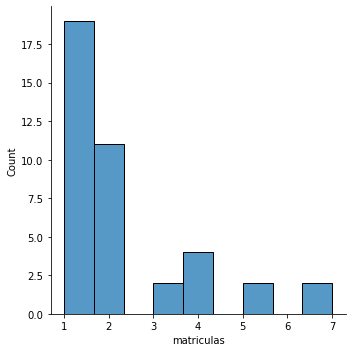

In [90]:
sns.displot(nomes.matriculas)

In [91]:
#Verfiicando a quantidade de alunos por curso
nomes.matriculas.value_counts()

1    19
2    11
4     4
7     2
3     2
5     2
Name: matriculas, dtype: int64

### Selecionando cursos

In [92]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [93]:
x

array([0.67552981, 0.77293447, 0.30998767, 0.74472124, 0.14119483,
       0.55882643, 0.23928427, 0.75886139, 0.82338864, 0.10534465,
       0.62695842, 0.44700908, 0.91272452, 0.76229407, 0.34818793,
       0.89846842, 0.86531094, 0.85227831, 0.90760209, 0.37514121])

In [94]:
prob

array([0.05570898, 0.06374166, 0.02556378, 0.061415  , 0.01164393,
       0.04608479, 0.01973308, 0.06258109, 0.06790247, 0.00868747,
       0.05170344, 0.03686354, 0.07526974, 0.06286418, 0.02871405,
       0.07409408, 0.07135968, 0.07028492, 0.07484731, 0.03093681])

In [95]:
#Escolhendo os cursos por alunos
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno','id_curso'])

In [96]:
matriculas

,id_aluno,id_curso
0,9,7
1,9,16
2,9,1
3,9,1
4,9,1
...,...,...
82,28,20
83,28,20
84,31,17
85,22,11


In [105]:
# Agrupar a quantidade de alunos por curso
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,7,Lógica de programação
2,2,Java para Web
3,4,C# para Web
4,5,Ruby on Rails
6,1,PHP com MySql
7,2,.NET para web
8,5,Novas integrações com Java
9,6,TDD com Java
11,3,Preparatório para certificação Java


In [106]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
3,FRANCISCO,5,@servicodoemail.com,francisco@servicodoemail.com,2
14,JESSICA,24,@dominiodoemail.com.br,jessica@dominiodoemail.com.br,1
8,LUIZ,27,@dominiodoemail.com.br,luiz@dominiodoemail.com.br,1


In [107]:
cursos.sample(3)

,nome_do_curso
id,
19,Boas práticas em Java
15,Análise de dados
6,PHP com MySql


In [108]:
matriculas.sample(3)

,id_aluno,id_curso
82,28,20
50,5,1
30,8,18


In [110]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,7,Lógica de programação
2,2,Java para Web
3,4,C# para Web


### Exportando os dados para o arquivo csv

In [113]:
# Salvando
matriculas_por_curso.to_csv('matriculas_por_curso.csv',index=False)

In [114]:
# Abrindo
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,7,Lógica de programação
1,2,Java para Web
2,4,C# para Web
3,5,Ruby on Rails
4,1,PHP com MySql
5,2,.NET para web
6,5,Novas integrações com Java
7,6,TDD com Java
8,3,Preparatório para certificação Java
9,4,Hardware básico


### Exportando os dados para o arquivo json

In [115]:
# Exportando os dados
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":7,"2":2,"3":4,"4":5,"6":1,"7":2,"8":5,"9":6,"11":3,"12":4,"13":3,"14":4,"15":4,"16":7,"17":9,"18":10,"19":9,"20":2},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

### Exportando os dados para arquivo html

In [116]:
matriculas_html = matriculas_por_curso.to_html()
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>quantidade_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>7</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>2</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>4</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>5</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>1</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>2</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>5</td>\n      <td>Novas integrações com Java</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>6</td>\n      <td>TDD com Java</td>\n    </tr>\n 

In [117]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>7</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>6</th>
      <td>1</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>2</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>5</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>6</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>11</th>
      <td>3</td>
      <td>Pr

### Exercício: Tabela html
Uma pessoa recebeu um arquivo do tipo csv para realizar uma determinada análise utilizando a biblioteca do pandas. Após finalizar sua análise, foi solicitado que o resultado fosse exibido no formato html.

Sabendo disso, analise as afirmações abaixo e marque a verdadeira.

Selecione uma alternativa

a) Para ler o arquivo csv, a pessoa utilizou a função pd.read_csv() e para transformar o DataFrame em html, utilizou a função out_html().<br>
b) Para ler o arquivo csv, a pessoa utilizou a função pd.csv() e para transformar o DataFrame em html, utilizou a função to_html().<br>
__c) Para ler o arquivo csv, a pessoa utilizou a função pd.read_csv() e para transformar o DataFrame em html, utilizou a função to_html().__

### Exercicio: Tipos vistos até aqui
Até este momento do curso, lemos e escrevemos em diferentes tipos de arquivos, conforme ilustra a tabela abaixo:

Tipo do arquivo	Entrada	Saída
json	pd.read_json()	código 4
html	código 2	código 5
csv	código 3	pd.to_csv()
Analise as afirmações abaixo e marque as verdadeiras

Selecione 3 alternativas


__a) Podemos substituir o código 2 para ler uma tabela de uma página html pelo código pd.read_html().<br>
b) Podemos substituir o código 3 para ler um arquivo csv com o código pd.read_csv().<br>
c) Podemos substituir o código 4 para escrever um DataFrame em json com o código to_json().<br>__
d) Podemos substituir o código 5 para escrever um DataFrame em uma tabela html com o código html().



## 4. Lendo e escrevendo SQL

## 5. Lendo e escrevendo EXCEL